In [1]:
import re
import mysql.connector
import pandas as pd
import pymysql
import numpy as np
import matplotlib.pyplot as plt
import re
import datetime
import seaborn as sns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import requests
import urllib.parse
import warnings
from bs4 import BeautifulSoup
from requests import get
import datetime
from datetime import datetime, timedelta
import praw
import copy

# Exploratory Data Analysis

In [2]:
gme_full = pd.read_csv('gme_full.csv')
gme_full

,Unnamed: 0,Date,Score,Total_Comments,Open,High,Low,Close,Adjusted_Close,Volume
0,0,2020-12-31,27,520,19.25,19.80,18.80,18.84,18.84,6922700.0
1,4,2021-01-04,99,1411,19.00,19.10,17.15,17.25,17.25,10022500.0
2,5,2021-01-05,74,3480,17.35,18.08,17.23,17.37,17.37,4961500.0
3,6,2021-01-06,169,935,17.34,18.98,17.33,18.36,18.36,6056200.0
4,7,2021-01-07,65,858,18.47,19.45,18.02,18.08,18.08,6129300.0
5,8,2021-01-08,124,1371,18.18,18.30,17.08,17.69,17.69,6482000.0
6,11,2021-01-11,371,3621,19.41,20.65,19.01,19.94,19.94,14927600.0
7,12,2021-01-12,261,1971,19.96,20.40,19.32,19.95,19.95,7060700.0
8,13,2021-01-13,6463,20506,20.42,38.65,20.03,31.40,31.40,144501700.0
9,14,2021-01-14,4388,20726,38.09,43.06,33.05,39.91,39.91,93717400.0


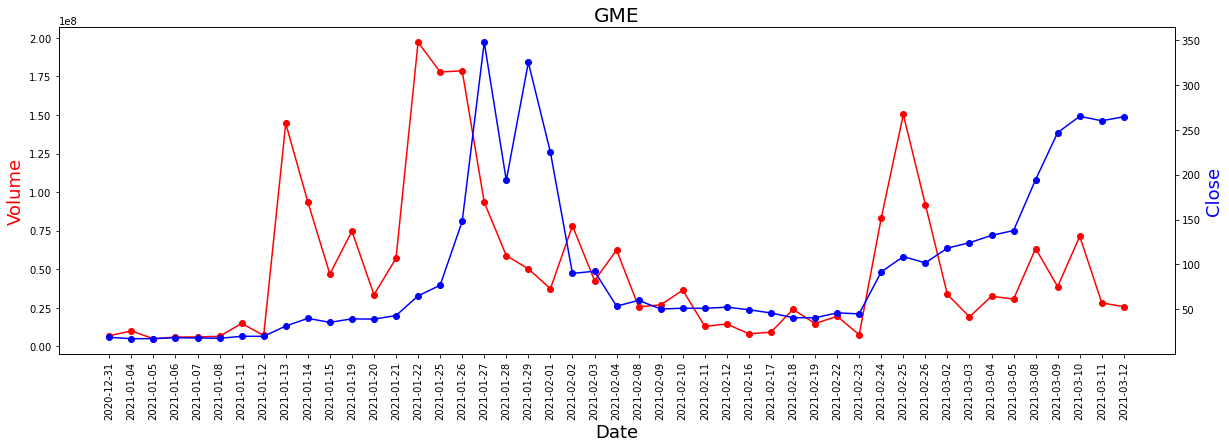

In [3]:
# create dual axises plot

# create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(20, 6), )

# make a plot
ax.plot(gme_full.Date,gme_full.Volume, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=18)
plt.xticks(rotation=90)
# set y-axis label
ax.set_ylabel("Volume",color="red",fontsize=18)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(gme_full.Date,gme_full.Close,color="blue",marker="o")
ax2.set_ylabel("Close",color="blue",fontsize=18)
plt.title("GME",fontsize=20)
plt.show()

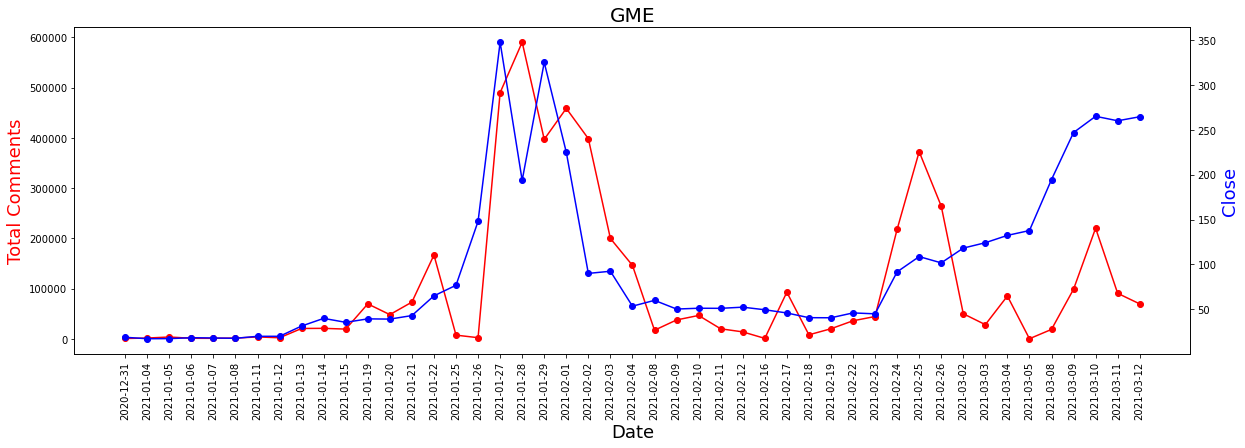

In [4]:
# comment vs close price 
# create dual axises plot

# create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(20, 6), )

# make a plot
ax.plot(gme_full.Date,gme_full.Total_Comments, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=18)
plt.xticks(rotation=90)
# set y-axis label
ax.set_ylabel("Total Comments",color="red",fontsize=18)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(gme_full.Date,gme_full.Close,color="blue",marker="o")
ax2.set_ylabel("Close",color="blue",fontsize=18)
plt.title("GME",fontsize=20)
plt.show()

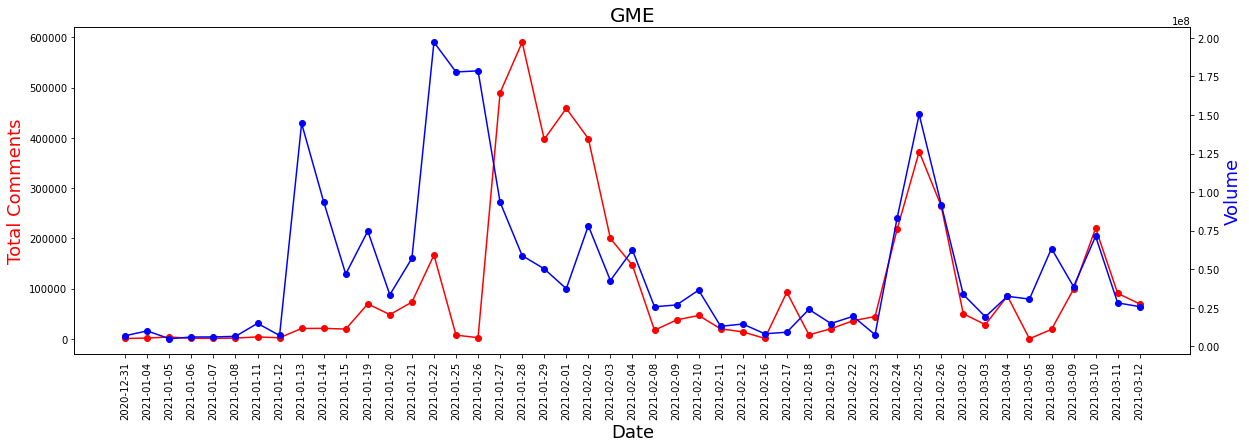

In [5]:
# comments vs volume 
# create dual axises plot
# create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(20, 6), )

# make a plot
ax.plot(gme_full['Date'],gme_full['Total_Comments'], color="red", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=18)
plt.xticks(rotation=90)
# set y-axis label
ax.set_ylabel("Total Comments",color="red",fontsize=18)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(gme_full['Date'],gme_full['Volume'],color="blue",marker="o")
ax2.set_ylabel("Volume",color="blue",fontsize=18)
plt.title("GME",fontsize=20)
plt.show()

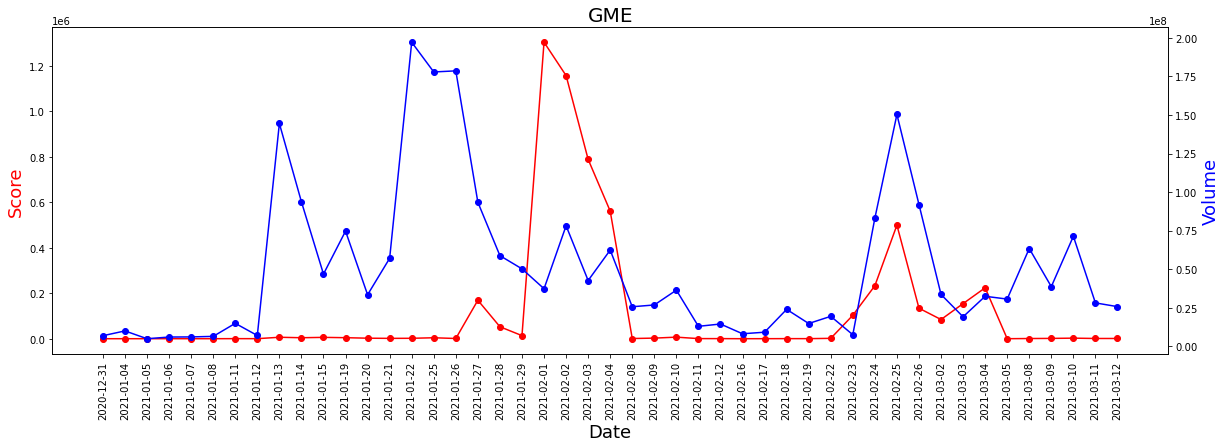

In [6]:
# score vs volume 
# create dual axises plot

# create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(20, 6), )

# make a plot
ax.plot(gme_full.Date,gme_full.Score, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=18)
plt.xticks(rotation=90)
# set y-axis label
ax.set_ylabel("Score",color="red",fontsize=18)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(gme_full.Date,gme_full.Volume,color="blue",marker="o")
ax2.set_ylabel("Volume",color="blue",fontsize=18)
plt.title("GME",fontsize=20)
plt.show()

# Word Cloud

In [7]:
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import nltk
from nltk.corpus import stopwords

In [8]:
df = pd.read_csv('gme_reddit.csv')
df

,Post ID,Title,Url,Author,Score,Publish Date,Total No. of Comments,Permalink,Flair
0,ko145e,"GME to 420.69, but only if we make it happen. ...",https://www.reddit.com/r/wallstreetbets/commen...,stevenconrad,1,2020-12-31 16:05:29,5,/r/wallstreetbets/comments/ko145e/gme_to_42069...,DD
1,ko1bnp,What would make GME shorts win?,https://www.reddit.com/r/wallstreetbets/commen...,dluther93,1,2020-12-31 16:18:03,0,/r/wallstreetbets/comments/ko1bnp/what_would_m...,Discussion
2,ko1kck,Not sure how reliable a random comment in Cohe...,https://pbs.twimg.com/media/EqmGLzSXEAArjcz?fo...,MilitaryBeetle,1,2020-12-31 16:32:49,36,/r/wallstreetbets/comments/ko1kck/not_sure_how...,Chart
3,ko1ttx,🚀🚀🚀🚀How have we been so fucking blind? GME is ...,https://www.reddit.com/r/wallstreetbets/commen...,WSBProfitProphet,1,2020-12-31 16:49:32,0,/r/wallstreetbets/comments/ko1ttx/how_have_we_...,Discussion
4,ko1xxb,GME is the Rockets 🚀🚀🚀🚀,https://www.reddit.com/r/wallstreetbets/commen...,WSBProfitProphet,1,2020-12-31 16:56:35,11,/r/wallstreetbets/comments/ko1xxb/gme_is_the_r...,Meme
...,...,...,...,...,...,...,...,...,...
143944,m4s00d,Evidence Points To GME Shorts Not Having Cover...,https://www.reddit.com/r/wallstreetbets/commen...,thedangerzone1,1,2021-03-14 01:22:05,2,/r/wallstreetbets/comments/m4s00d/evidence_poi...,YOLO
143945,m4s0l4,GME error while buying on fidelity,https://www.reddit.com/r/wallstreetbets/commen...,Shaftershafter,1,2021-03-14 01:23:24,0,/r/wallstreetbets/comments/m4s0l4/gme_error_wh...,Discussion
143946,m4s239,If we can increase the value of GME can we dec...,https://www.reddit.com/r/wallstreetbets/commen...,WTBilly,1,2021-03-14 01:26:57,0,/r/wallstreetbets/comments/m4s239/if_we_can_in...,Discussion
143947,m4s2qi,GME or AMC,https://www.reddit.com/r/wallstreetbets/commen...,ParallelTony,1,2021-03-14 01:28:23,0,/r/wallstreetbets/comments/m4s2qi/gme_or_amc/,Discussion


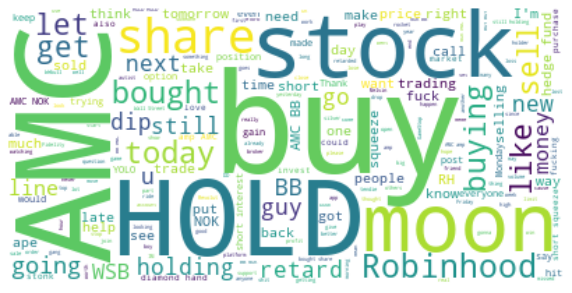

In [9]:
text = " ".join(review for review in df.Title)
stopwords = nltk.corpus.stopwords.words('english')
stopwords.append('GME')
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure(figsize=(10,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Sentimental Analysis

In [10]:
title = df[['Title','Publish Date']].copy()
title = title.dropna()
title.Title =title.Title.str.lower()

#Remove handlers
title.Title = title.Title.apply(lambda x:re.sub('@[^\s]+','',x))

# Remove URLS
title.Title = title.Title.apply(lambda x:re.sub(r"http\S+", "", x))

# Remove all the special characters
title.Title = title.Title.apply(lambda x:' '.join(re.findall(r'\w+', x)))

#remove all single characters
title.Title = title.Title.apply(lambda x:re.sub(r'\s+[a-zA-Z]\s+', '', x))

# Substituting multiple spaces with single space
title.Title = title.Title.apply(lambda x:re.sub(r'\s+', ' ', x, flags=re.I))

#Remove Time From Timestamp
title['Publish Date'] = pd.to_datetime(title['Publish Date']).dt.date

In [11]:
sid = SentimentIntensityAnalyzer()
title2 = copy.deepcopy(title)
title2['sentiments'] = title2['Title'].apply(lambda x: sid.polarity_scores(' '.join(re.findall(r'\w+',x.lower()))))
title2['compound'] = title2['sentiments'].apply(lambda score_dict: score_dict['compound'])

def compound_score(x):
    if x > 0:
        return 'Postive'
    elif x < 0:
        return 'Negative'
    else:
        return 'Neutral'


title2['comp_score'] = title2['compound'].apply(lambda c: compound_score(c))

title2.head()

,Title,Publish Date,sentiments,compound,comp_score
0,gme to 420 69 but only if we make it happen dd...,2020-12-31,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,what would make gme shorts win,2020-12-31,"{'neg': 0.0, 'neu': 0.568, 'pos': 0.432, 'comp...",0.5859,Postive
2,not sure how reliablerandom comment in cohens ...,2020-12-31,"{'neg': 0.305, 'neu': 0.564, 'pos': 0.131, 'co...",-0.6521,Negative
3,how have we been so fucking blind gme is liter...,2020-12-31,"{'neg': 0.229, 'neu': 0.771, 'pos': 0.0, 'comp...",-0.5059,Negative
4,gme is the rockets,2020-12-31,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


In [12]:
# delete neutral
title2 = title2[title2['comp_score'] != 'Neutral']

title3 = title2.groupby(by=["Publish Date"])['comp_score'].value_counts()

title3 = pd.DataFrame(title3)
title3.rename(columns={"comp_score": "frequency"}, inplace = True)
title3.reset_index(inplace = True)
title3 = title3.pivot(index="Publish Date", columns="comp_score", values="frequency")

title3.head()

comp_score,Negative,Postive
Publish Date,,
2020-12-31,7,10
2021-01-01,9,11
2021-01-02,7,7
2021-01-03,7,9
2021-01-04,16,27


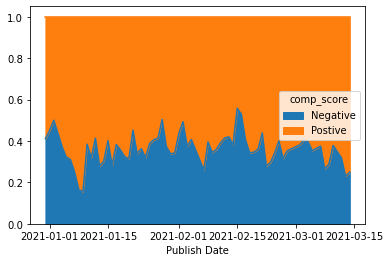

In [13]:
normalizedDataFrame = title3.div(title3.sum(axis=1), axis=0)

years  = title3.index

normalizedDataFrame.index = years;

# Draw a percentage based, stacked area plot

normalizedDataFrame.plot.area(stacked=True);

plt.show(block=True);

In [14]:
#plot trend

In [15]:
title4 = title2.groupby(by=["Publish Date"])['compound'].sum()
title4 = pd.DataFrame(title4)
title4 = title4.reset_index()
title4.rename(columns={"Publish Date": "Date"}, inplace = True)
title4

,Date,compound
0,2020-12-31,2.6334
1,2021-01-01,0.9778
2,2021-01-02,-0.2148
3,2021-01-03,0.6531
4,2021-01-04,6.7095
...,...,...
64,2021-03-10,126.5378
65,2021-03-11,66.8776
66,2021-03-12,59.8068
67,2021-03-13,58.5348


In [16]:
gme_full.drop('Unnamed: 0', axis='columns', inplace=True)

In [17]:
title4['Date'] = title4['Date'].astype('period[D]')
gme_full['Date'] = gme_full['Date'].astype('period[D]')

In [18]:
gme = pd.merge(gme_full, title4, on='Date')
gme.Date = gme.Date.astype(str)
gme
#gme= gme.dropna()

,Date,Score,Total_Comments,Open,High,Low,Close,Adjusted_Close,Volume,compound
0,2020-12-31,27,520,19.25,19.80,18.80,18.84,18.84,6922700.0,2.6334
1,2021-01-04,99,1411,19.00,19.10,17.15,17.25,17.25,10022500.0,6.7095
2,2021-01-05,74,3480,17.35,18.08,17.23,17.37,17.37,4961500.0,4.1103
3,2021-01-06,169,935,17.34,18.98,17.33,18.36,18.36,6056200.0,4.9621
4,2021-01-07,65,858,18.47,19.45,18.02,18.08,18.08,6129300.0,1.9289
5,2021-01-08,124,1371,18.18,18.30,17.08,17.69,17.69,6482000.0,8.5347
6,2021-01-11,371,3621,19.41,20.65,19.01,19.94,19.94,14927600.0,8.7888
7,2021-01-12,261,1971,19.96,20.40,19.32,19.95,19.95,7060700.0,1.9466
8,2021-01-13,6463,20506,20.42,38.65,20.03,31.40,31.40,144501700.0,76.0649
9,2021-01-14,4388,20726,38.09,43.06,33.05,39.91,39.91,93717400.0,71.4200


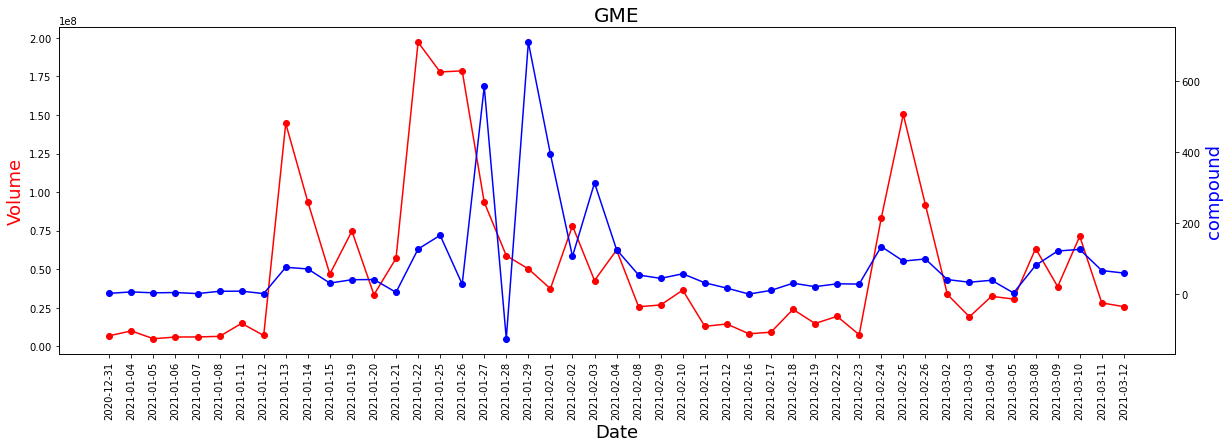

In [19]:

# create dual axises plot

# create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(20, 6), )

# make a plot
ax.plot(gme.Date,gme.Volume, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=18)
plt.xticks(rotation=90)
# set y-axis label
ax.set_ylabel("Volume",color="red",fontsize=18)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(gme.Date,gme.compound,color="blue",marker="o")
ax2.set_ylabel("compound",color="blue",fontsize=18)
plt.title("GME",fontsize=20)
plt.show()

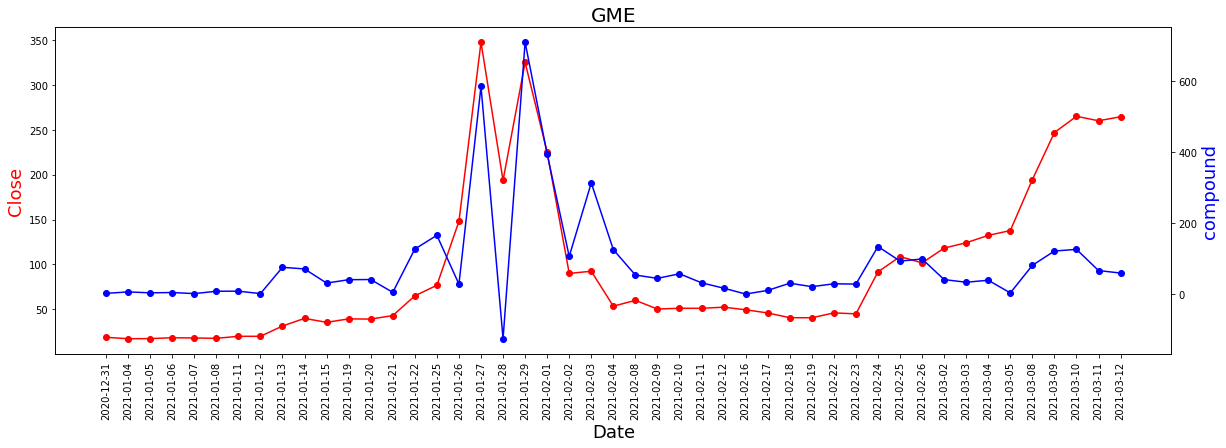

In [20]:
# create dual axises plot

# create figure and axis objects with subplots()

fig,ax = plt.subplots(figsize=(20, 6), )

# make a plot
ax.plot(gme.Date,gme.Close, color="red", marker="o")
# set x-axis label
ax.set_xlabel("Date",fontsize=18)
plt.xticks(rotation=90)
# set y-axis label
ax.set_ylabel("Close",color="red",fontsize=18)

# twin object for two different y-axis on the sample plot
ax2=ax.twinx()
# make a plot with different y-axis using second axis object
ax2.plot(gme.Date,gme.compound,color="blue",marker="o")
ax2.set_ylabel("compound",color="blue",fontsize=18)
plt.title("GME",fontsize=20)
plt.show()